In [1]:
import pandas as pd
df_bikes=pd.read_csv("bikes.csv",parse_dates=["date"])
df_bikes

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
186,2011-07-08,28.187490,63.618656,19.761499,692.000000
187,2011-07-09,29.070524,61.346450,21.121738,702.333333
188,2011-07-10,29.953558,59.074244,22.481976,712.666667
189,2011-07-11,30.836592,56.802038,23.842215,723.000000


In [2]:
#checking the datatypes
df_bikes.dtypes

date           datetime64[ns]
temperature           float64
humidity              float64
windspeed             float64
count                 float64
dtype: object

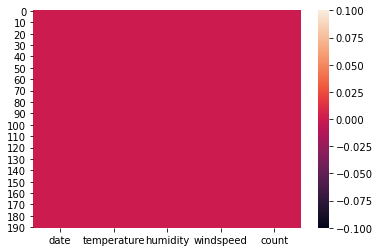

In [3]:
#checking wheteher there is null values or not
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_bikes.isnull())
plt.show()

In [4]:
# from dates we can get monthly,daily,yearly average counts of bikes which can help in data analysis
df_bikes_dates=pd.DataFrame()
df_bikes_dates["month"]=df_bikes["date"].dt.month_name()
df_bikes_dates["year"]=df_bikes["date"].dt.year
df_bikes_dates["day"]=df_bikes["date"].dt.day_name()
df_bikes_dates["count"]=df_bikes["count"]
df_bikes_dates

,month,year,day,count
0,January,2011,Monday,120.000000
1,January,2011,Tuesday,108.000000
2,January,2011,Wednesday,82.000000
3,January,2011,Thursday,88.000000
4,January,2011,Friday,148.000000
...,...,...,...,...
186,July,2011,Friday,692.000000
187,July,2011,Saturday,702.333333
188,July,2011,Sunday,712.666667
189,July,2011,Monday,723.000000


In [5]:
df_bikes_dates.dtypes

month     object
year       int64
day       object
count    float64
dtype: object

In [6]:
#checking the total number of distict year
df_bikes_dates["year"].drop_duplicates()

0    2011
Name: year, dtype: int64

In [7]:
#making one more colum which tell whether it is weekday or weekend
import numpy as np
df_bikes_dates["type_of_day"]=np.where((df_bikes_dates["day"]=="Sunday")|(df_bikes_dates["day"]=="Saturday"),"weekend","weekday")

In [8]:
df_bikes_dates

,month,year,day,count,type_of_day
0,January,2011,Monday,120.000000,weekday
1,January,2011,Tuesday,108.000000,weekday
2,January,2011,Wednesday,82.000000,weekday
3,January,2011,Thursday,88.000000,weekday
4,January,2011,Friday,148.000000,weekday
...,...,...,...,...,...
186,July,2011,Friday,692.000000,weekday
187,July,2011,Saturday,702.333333,weekend
188,July,2011,Sunday,712.666667,weekend
189,July,2011,Monday,723.000000,weekday


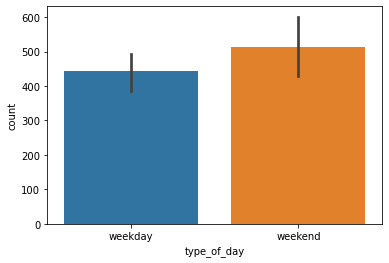

In [9]:
 #Lets make the barplot for average count during and weekdays
sns.barplot(x="type_of_day",y="count",data=df_bikes_dates)
plt.show()
# from this we come to know during weekends average count is more

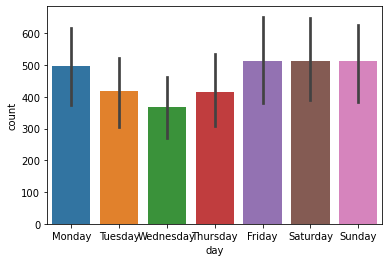

In [10]:
#average counts during days of week
sns.barplot(x="day",y="count",data=df_bikes_dates)
plt.show()

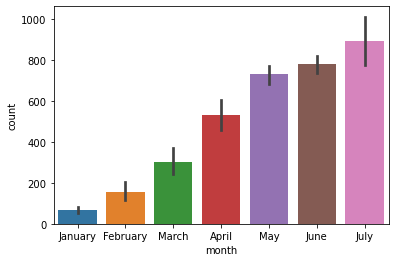

In [11]:
#average counts during months of an year
sns.barplot(x="month",y="count",data=df_bikes_dates)
plt.show()
#it shows average count is increasing from jan to july

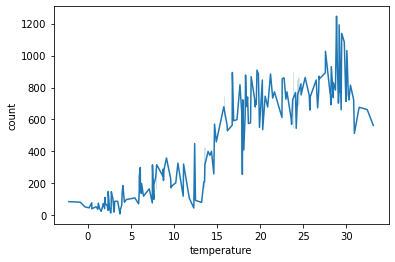

In [12]:
#using lineplot from seaborn to check how count varies with temprature
sns.lineplot(x="temperature",y="count",data=df_bikes)
plt.show()

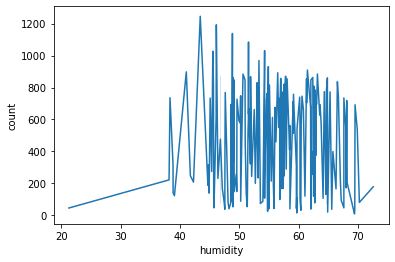

In [13]:
#change with humidity
sns.lineplot(x="humidity",y="count",data=df_bikes)
plt.show()

In [14]:
#lets check the skewness of the dataset
df_bikes.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
count          0.153032
dtype: float64

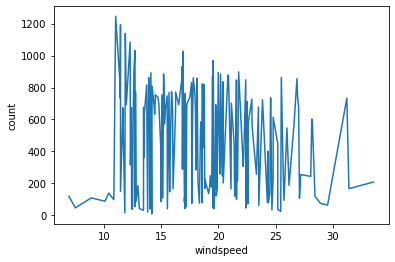

In [15]:
#change with windspeed
sns.lineplot(x="windspeed",y="count",data=df_bikes)
plt.show()

In [16]:
#seprating into input and output variables
df_x=df_bikes.drop(columns=["count","date"])
y=pd.DataFrame(df_bikes["count"])

In [18]:
# scaling the input variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [19]:
#Lets check the skewness
x.skew()

temperature    0.053735
humidity      -0.417698
windspeed      0.341381
dtype: float64

In [20]:
#Here we will find out random state value with which our linear model learns maximum
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
max_r_score=0
for r_state in range(42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state,"is",max_r_score)        

max r2 score corresponding to  88 is 0.9068265759551855


In [22]:
#Lets use cross val score function to check above is overfitting or not
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score


array([-6.2403113 ,  0.36358796,  0.71325042, -1.31452664, -0.23217497])

In [23]:
#Lets make out final model
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=88,test_size=0.20)
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [24]:
#Lets find the rmse and r2_score using sklearn.metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 95.32465795102232
r2_score is: 0.9068265759551855


In [26]:
import joblib
# save the model as a pickle in a file
joblib.dump(regr,"bikes_linear_reg.pkl")

['bikes_linear_reg.pkl']